In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sclibrary import SCPlot
from sclibrary import read_B1_B2
from sclibrary.io.network_reader import read_coordinates

In [3]:
B1_dataset_path = "data/test_dataset/B1_chicago_sketch.csv"
B2_dataset_path = "data/test_dataset/B2t_chicago_sketch.csv"

scbuilder, triangles = read_B1_B2(B1_dataset_path, B2_dataset_path)
sc = scbuilder.to_simplicial_complex(triangles=triangles)

# read coordinates
coordinates_path = "data/test_dataset/coordinates_chicago_sketch.csv"
coordinates = read_coordinates(coordinates_path, node_id_col="Id", x_col="X", y_col="Y", delimeter=",", start_index_zero=True)

# read flow
flow_path = "data/test_dataset/flow_chicago_sketch.csv"
flow = pd.read_csv(flow_path, delimiter=",", header=None).to_numpy().flatten()
print("Flow:", len(flow))

Num. of nodes: 546
Num. of edges: 1088
Num. of triangles: 112
Shape: (546, 1088, 112)
Max Dimension: 2
Flow: 1088


In [4]:
scplot = SCPlot(simplical_complex=sc, coordinates=coordinates)

## Plotting

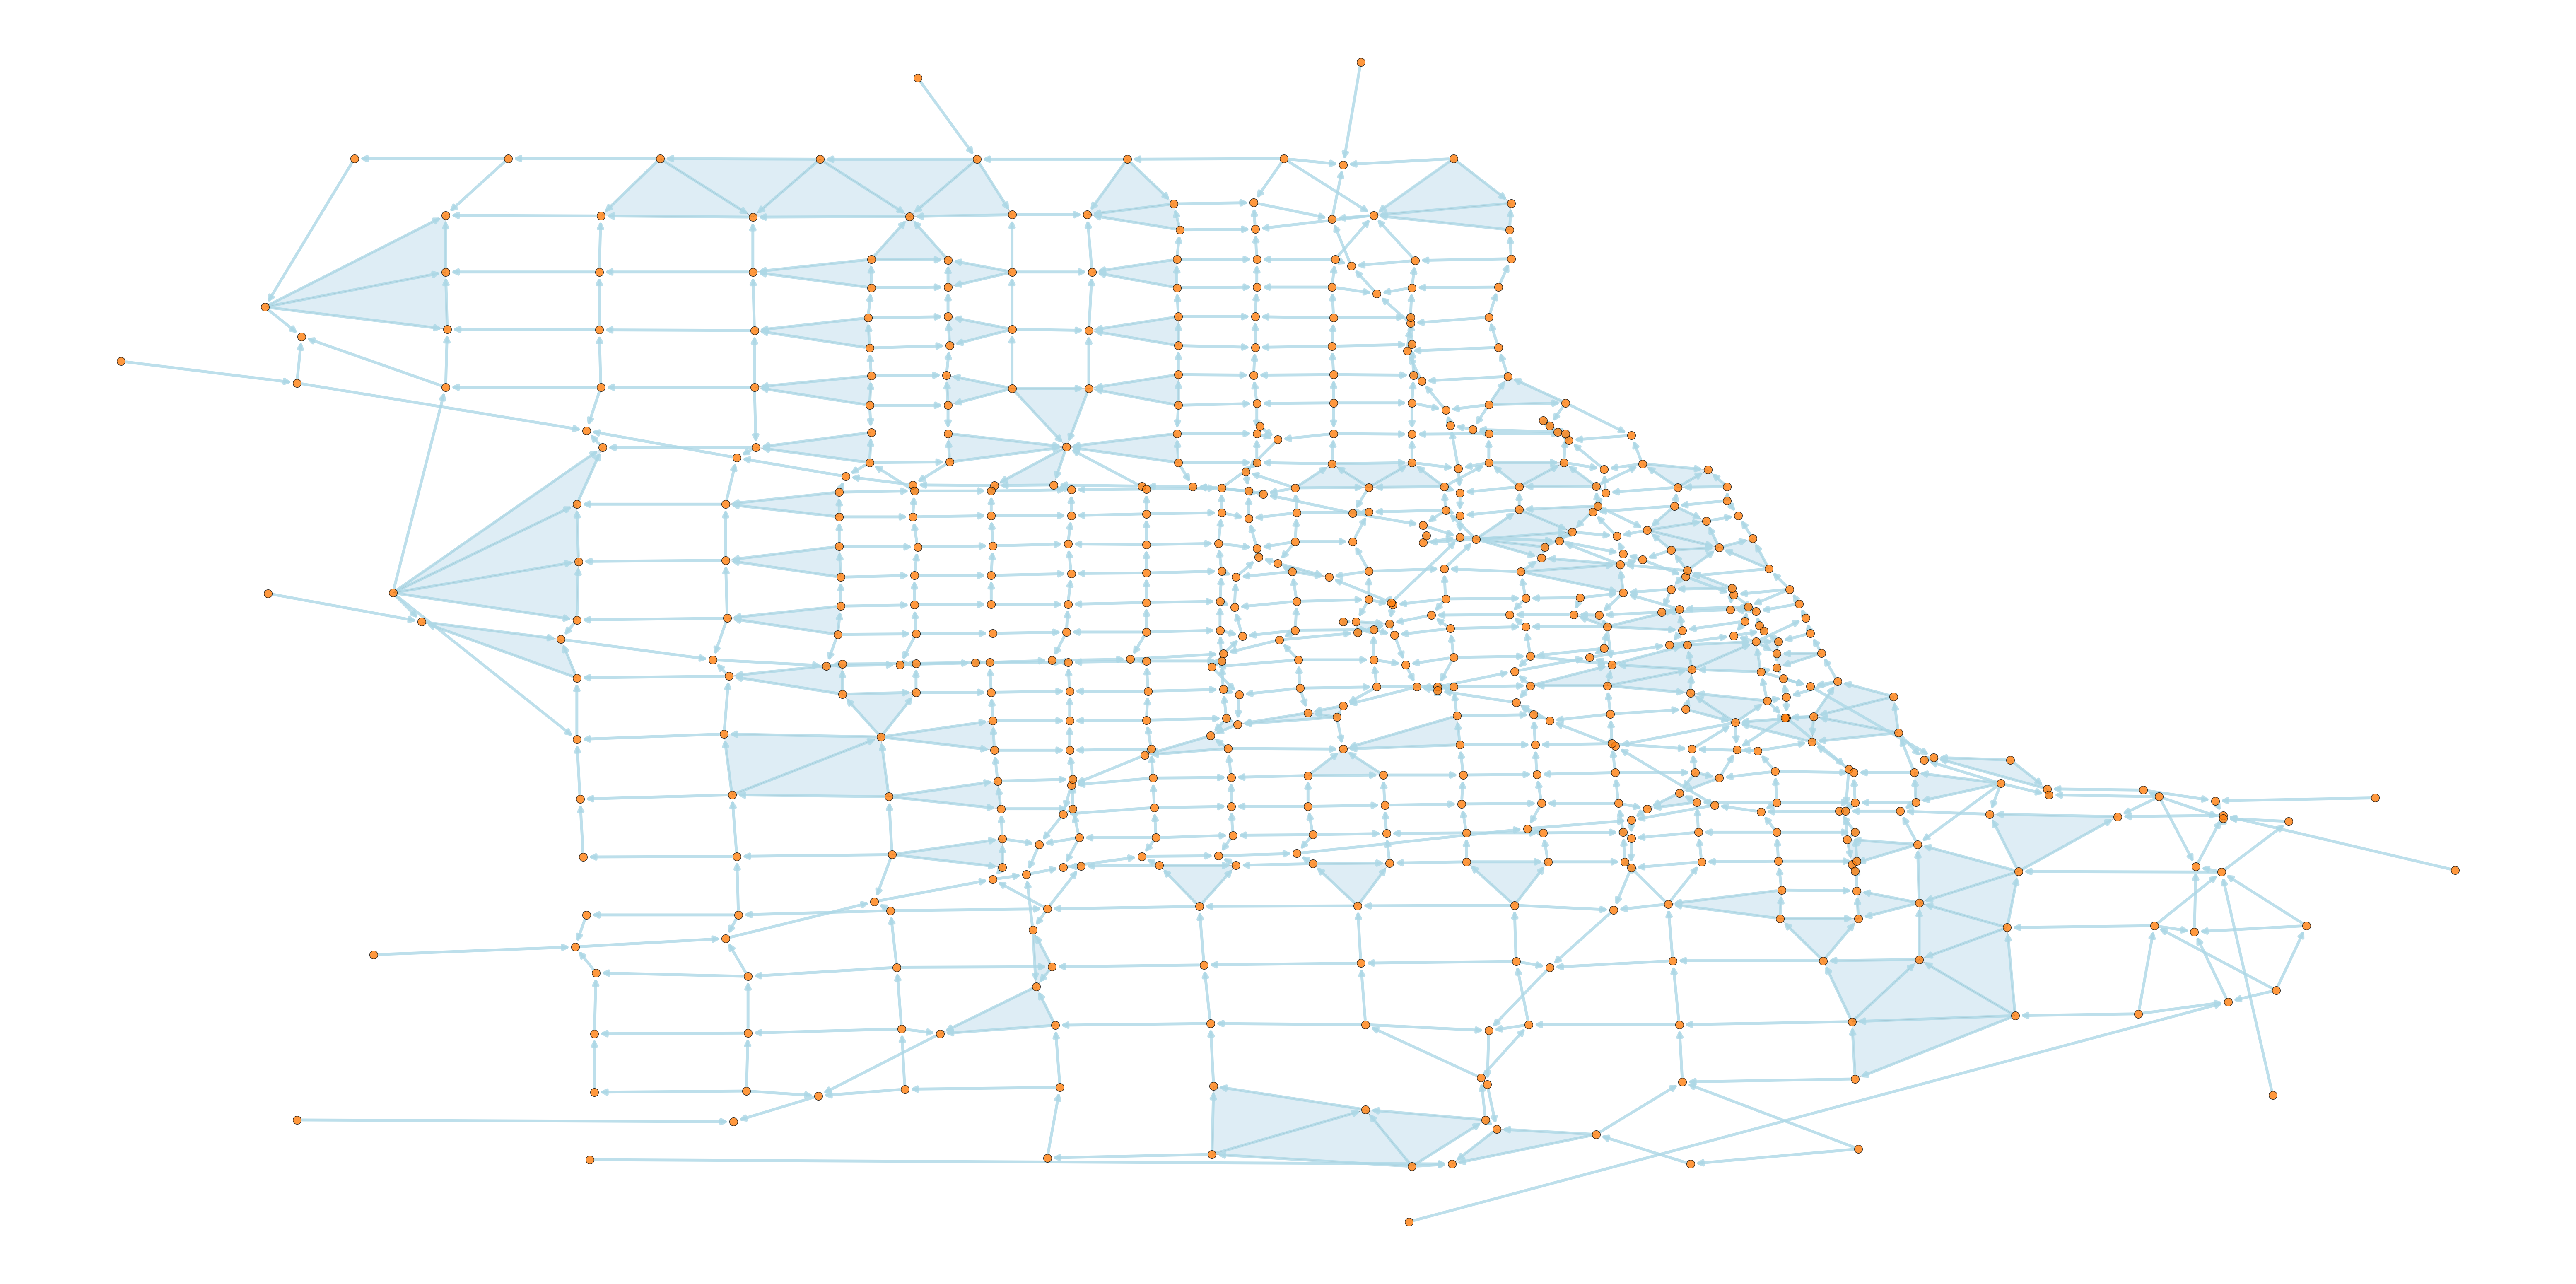

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(80, 40))
scplot.draw_network(with_labels=False, node_size=200, arrowsize=20, ax=ax)

## Filters

### Edge flow denoising

In [20]:
from sclibrary.filters import EdgeFlowDenoising

# denoising with lowe pass filter
efd = EdgeFlowDenoising(simplicial_complex=sc)
mu_vals = [i/100 for i in range(1, 10)]
efd.denoise(f=flow, f_true=flow, p_choice="L1", mu_vals=mu_vals)

f_est_L1 = efd.history["f_estimated"]

mu: 0.01, error: 0.01216636501100936
mu: 0.02, error: 0.02332483210797497
mu: 0.03, error: 0.033627052510036795
mu: 0.04, error: 0.04319253143617094
mu: 0.05, error: 0.052117201419393216
mu: 0.06, error: 0.060479294718037174
mu: 0.07, error: 0.06834348102624978
mu: 0.08, error: 0.07576385444634778
mu: 0.09, error: 0.08278613558305639


### LS Filter Design

In [21]:
from sclibrary.filters import LSFilterDesign

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Subcomponent extraction type I

In [22]:
filter_size = 12

lsfilter.subcomponent_extraction_type_one(
   f=flow, component="gradient", L=filter_size,
)

f_estimated = lsfilter.history["f_estimated"]

Filter size: 0 - Error: 0.5769257123944498
Filter size: 1 - Error: 0.7647059947638217
Filter size: 2 - Error: 0.7991692484418745
Filter size: 3 - Error: 0.7988553330560938
Filter size: 4 - Error: 0.7780263603481664
Filter size: 5 - Error: 0.7398538634068246
Filter size: 6 - Error: 0.7067077348911396
Filter size: 7 - Error: 0.6855500812226126
Filter size: 8 - Error: 0.673089297486092
Filter size: 9 - Error: 0.6536349642836928
Filter size: 10 - Error: 0.6101670620963325
Filter size: 11 - Error: 0.5553895900158182


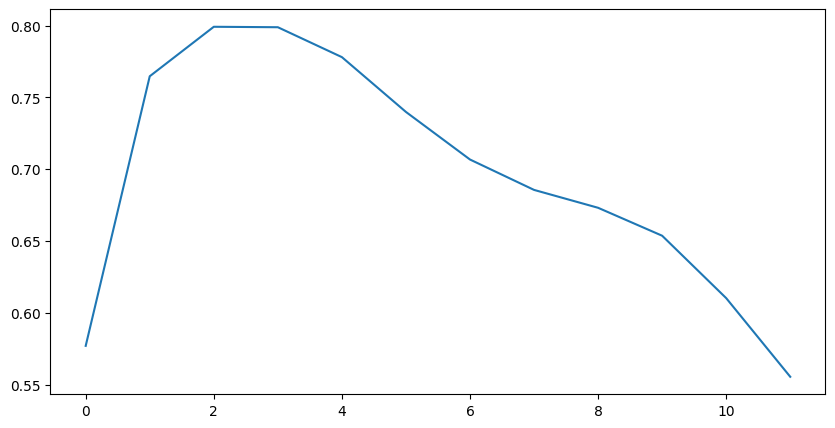

In [23]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(lsfilter.history["extracted_component_error"])

#### Subcomponent extraction type II

In [24]:
filter_size = 12

lsfilter.subcomponent_extraction_type_two(
    f=flow, component="gradient", L=filter_size
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.history["extracted_component_error"][-1])

Filter size: 0 - Error: 0.5767144015454567
Filter size: 1 - Error: 0.5733410151652752
Filter size: 2 - Error: 0.5681635016856332
Filter size: 3 - Error: 0.5617014670848272
Filter size: 4 - Error: 0.553071079052139
Filter size: 5 - Error: 0.542644562109765
Filter size: 6 - Error: 0.5311323570831853
Filter size: 7 - Error: 0.5188161033458347
Filter size: 8 - Error: 0.5059164150068906
Filter size: 9 - Error: 0.49270471549124933
Filter size: 10 - Error: 0.478655533549342
Filter size: 11 - Error: 0.4633698303115759
Error: 0.4633698303115759


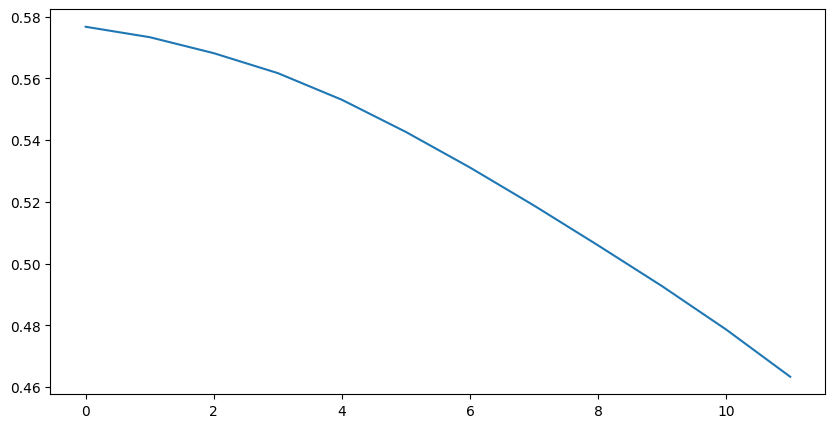

In [25]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(lsfilter.history["extracted_component_error"])

### Grid-based filter design

In [26]:
from sclibrary.filters import GridBasedFilterDesign

gridfilter = GridBasedFilterDesign(simplicial_complex=sc)

In [27]:
filter_size = 12

gridfilter.subcomponent_extraction(f=flow, f_true=flow, p_choice="L1L", component="gradient", L=filter_size)

Filter size: 0 - Error: 0.4990808823529418
Filter size: 1 - Error: 1.091455653190079
Filter size: 2 - Error: 1.1456133675734066
Filter size: 3 - Error: 1.0460019589281073
Filter size: 4 - Error: 0.9074921874646322
Filter size: 5 - Error: 0.857230612202891
Filter size: 6 - Error: 1.037301141338813
Filter size: 7 - Error: 1.1420320943113293
Filter size: 8 - Error: 0.9679067081791847
Filter size: 9 - Error: 0.8546676152075549
Filter size: 10 - Error: 0.979116456217995
Filter size: 11 - Error: 0.8812244294857314


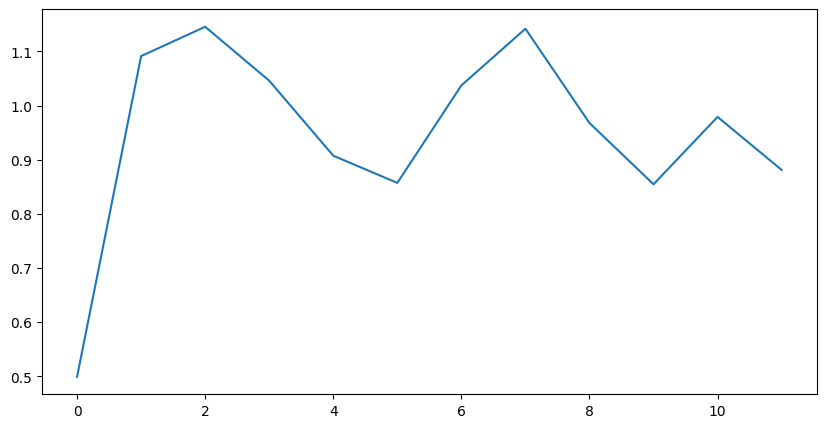

In [28]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(gridfilter.history["extracted_component_error"])

### Chebyshev filter design

In [29]:
from sclibrary.filters import ChebyshevFilterDesign

chebfilter = ChebyshevFilterDesign(simplicial_complex=sc)

[0.26894142 0.26894142 0.26894142 ... 1.         1.         1.        ]


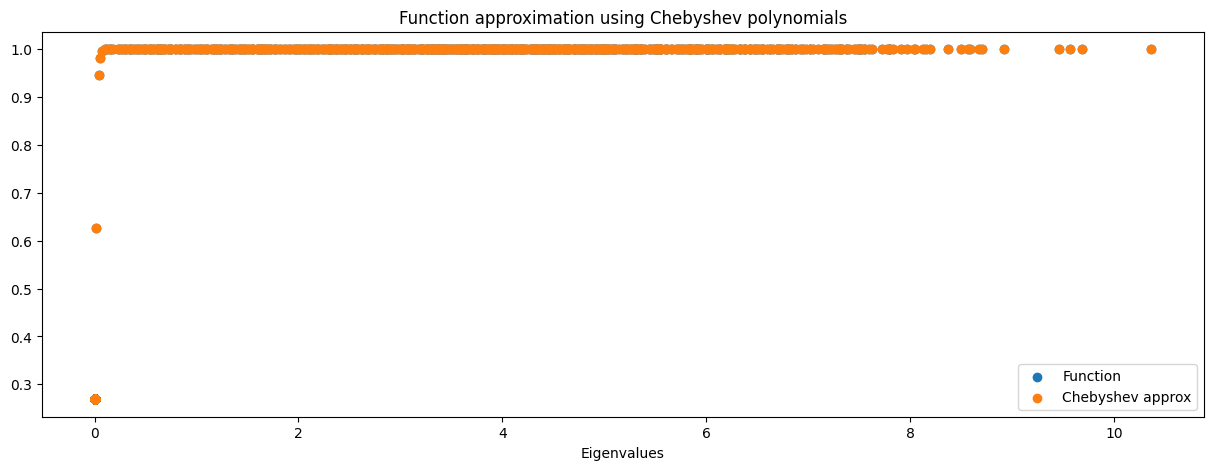

In [30]:
chebfilter.plot_chebyshev_series_approx(p_choice="L1L")

In [31]:
filter_size = 20

chebfilter.apply(f=flow, p_choice="L1L", component="gradient", L=filter_size, 
                               cut_off_frequency=0.01, steep=100, n=100)

Calculating Chebyshev filter approximation for k = 0...
Calculating Chebyshev filter approximation for k = 1...
Calculating Chebyshev filter approximation for k = 2...
Calculating Chebyshev filter approximation for k = 3...
Calculating Chebyshev filter approximation for k = 4...
Calculating Chebyshev filter approximation for k = 5...
Calculating Chebyshev filter approximation for k = 6...
Calculating Chebyshev filter approximation for k = 7...
Calculating Chebyshev filter approximation for k = 8...
Calculating Chebyshev filter approximation for k = 9...
Calculating Chebyshev filter approximation for k = 10...
Calculating Chebyshev filter approximation for k = 11...
Calculating Chebyshev filter approximation for k = 12...
Calculating Chebyshev filter approximation for k = 13...
Calculating Chebyshev filter approximation for k = 14...
Calculating Chebyshev filter approximation for k = 15...
Calculating Chebyshev filter approximation for k = 16...
Calculating Chebyshev filter approximatio

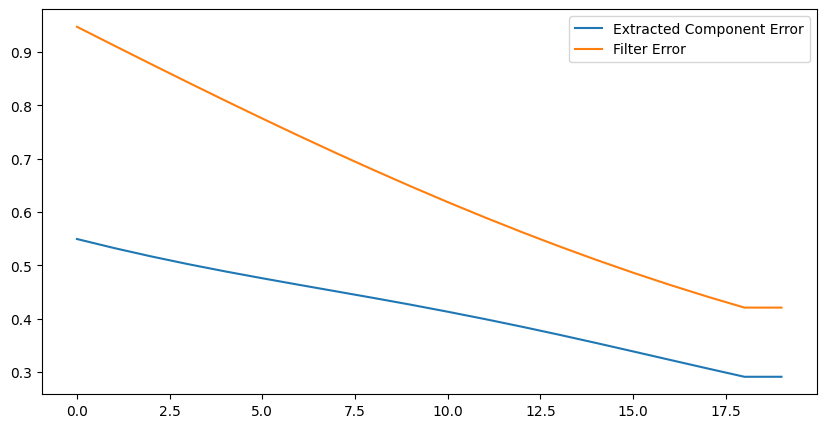

In [32]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(chebfilter.history["extracted_component_error"])
plt.plot(chebfilter.history["filter_error"])
plt.legend(["Extracted Component Error", "Filter Error"])

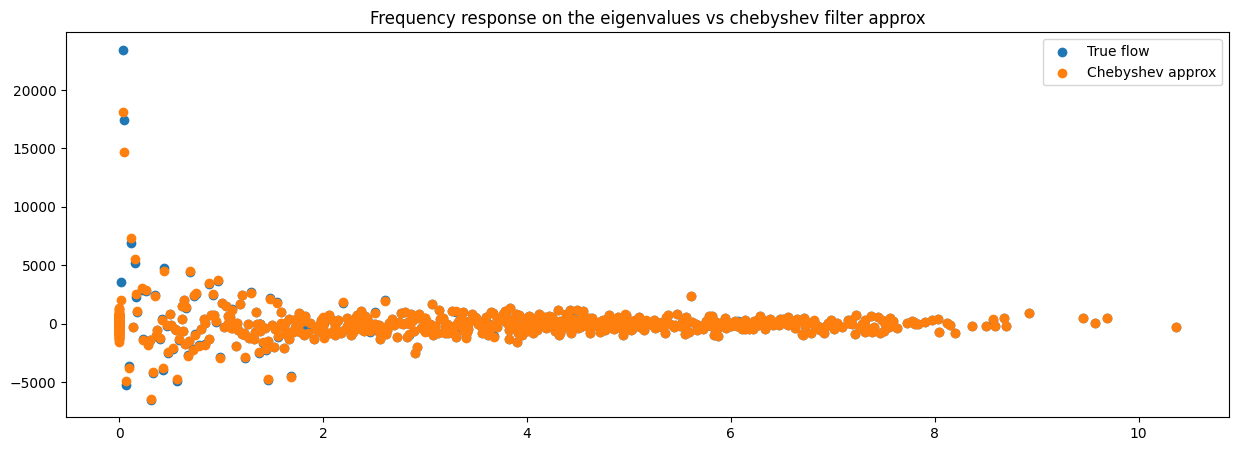

In [33]:
chebfilter.plot_frequency_response_approx(flow=flow, component="gradient")